<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [217]:
import pandas as pd
import psycopg2
import plotly.express as px
import requests
import warnings
warnings.filterwarnings('ignore')

In [218]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [219]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [220]:
# текст запроса
query_3_1 = f'''select count(id) cnt from VACANCIES'''
df_vac = pd.read_sql_query(query_3_1, connection)

In [221]:
# результат запроса 
print(f'Количество вакансий в нашей базе = {int(df_vac.values)}')

Количество вакансий в нашей базе = 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [222]:
# текст запроса EMPLOYERS
query_3_2 = f'''select count(id) from EMPLOYERS'''
df_emp = pd.read_sql_query(query_3_2, connection)

In [223]:
# результат запроса 
print(f'Количество работодателей = {int(df_emp.values)}')

Количество работодателей = 23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [224]:
# текст запроса
query_3_3 = f'''select count(id) from AREAS'''
df_ar = pd.read_sql_query(query_3_3, connection)

In [225]:
# результат запроса 
print(f'Количество  регионов = {int(df_ar.values)}')

Количество  регионов = 1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [226]:
# текст запроса
query_3_4 = f'''select count(id) from INDUSTRIES'''
df_ind = pd.read_sql_query(query_3_4, connection)

In [227]:
# результат запроса
print(f'Количество  сфер деятельности в базе = {int(df_ind.values)}')

Количество  сфер деятельности в базе = 294


***

### Вывод :
* Количество вакансий в нашей базе     = 49197
* Количество работодателей             = 23501
* Количество  регионов                 = 1362
* Количество  сфер деятельности в базе = 294 

#### Наша база данных имеет достаточный объем данных для дальнейшего анализа.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [228]:
# текст запроса
query = f'''select a.name as area, count(v.id) as cnt
              from VACANCIES v
              join AREAS a on v.AREA_id = a.id
              group by a.name
              order by 2 desc
         '''
df = pd.read_sql_query(query, connection)

In [229]:
# результат запроса
display(df.head())

,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [230]:
# текст запроса
query = f'''select count(v.id) as cnt
              from VACANCIES v
              where v.salary_from is not null 
                 or v.salary_to   is not null
         '''
df = pd.read_sql_query(query, connection)

In [231]:
# результат запроса
print(f'Количество вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой = {int(df.values)}')

Количество вакансий, у которых заполнено хотя бы одно из двух полей с зарплатой = 24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [232]:
# текст запроса
query = f'''select avg(v.salary_from) as avg_salary_from
                  ,avg(v.salary_to)   as avg_salary_to 
              from VACANCIES v 
         '''
df = pd.read_sql_query(query, connection)

In [233]:
# результат запроса
avg_salary_from,avg_salary_to = round(float(df['avg_salary_from'].values)),round(float(df['avg_salary_to'].values))
print(f'Средние значения для нижней и верхней границы зарплатной вилки от {avg_salary_from} до {avg_salary_to}') 

Средние значения для нижней и верхней границы зарплатной вилки от 71065 до 110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [234]:
# текст запроса
query = f'''select schedule   as "Тип рабочего графика" 
                  ,employment as "Тип трудоустройства"
                  ,count(id)  as "Кол-во вакансий"
              from VACANCIES 
              group by  schedule , employment
              order by 3 desc
         '''
df = pd.read_sql_query(query, connection)

In [235]:
# результат запроса
display(df.head(30))
#многоуровневая столбчатая диаграмма
fig=px.bar(
    data_frame = df,
    x='Кол-во вакансий',
    y='Тип трудоустройства',
    #barmode='group',
    color='Тип рабочего графика',
    labels={'Кол-во вакансий':'Кол-во вакансий', 'Тип трудоустройства':'Тип трудоустройства'},
    height=300,
    width=1000,
    title='Зависимость кол-ва вакансий от Типа трудоустройства и Типа рабочего графика'
)
fig.update_layout(
     bargap           = 0.2
    ,legend_bgcolor   = '#dee8fc'
    ,legend_title     = 'Типа рабочего графика :'
)
fig.update_layout(title_xanchor='center', title_x=0.5)
fig.show()

,Тип рабочего графика,Тип трудоустройства,Кол-во вакансий
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [236]:
# текст запроса
query = f'''select experience as "Требуемый опыт работы"
                  ,count(id)  as "Кол-во вакансий"
              from VACANCIES 
              group by experience
              order by 2
         '''
df = pd.read_sql_query(query, connection)

In [237]:
# результат запроса 
str = ' - '.join(list(df['Требуемый опыт работы'].values))
print(str)

#строим круговую диаграмму 
fig = px.pie(df, values='Кол-во вакансий', names='Требуемый опыт работы', title='Процентное соотношение по признаку Требуемый опыт работы')
fig.show()

Более 6 лет - Нет опыта - От 3 до 6 лет - От 1 года до 3 лет


## Выводы по детальному анализу вакансий :
* Основная масса вакансий на с типом трудоустройства на полный рабочий день , с типом рабочего графика полная занятость
* Процентное соотношение по опыту работы : 53% - От 1 года до 3 лет , 29.5% - От 3 до 6 лет , 14.6 - Нет опыта , 2.7% - Более 6 лет

> Основная масса работодателей хотят видеть в своей компании молодых специалистов готовых на полный рабочий день с полной занятостью , молодых потому что их уровень заработной платы самый низкий. Также работодатель готов предоставить соискателю удаленный формат работы , но таких вакансий примерно в три раза меньше , предполагаю , что это связано с тем  что в нашей базе представлены вакансии не только из IT сферы .


***

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [238]:
# текст запроса
query = f'''with ds as (select n.name 
                              ,count(v.id) cnt
                          from VACANCIES v
                          join EMPLOYERS n on v.EMPLOYER_id = n.id
                         group by n.name
                         order by 2 desc 
                         limit 5)
            (select ds.name, ds.cnt 
            from ds   
            order by 2 desc
            limit 1)
            
            union all
            
            (select ds.name, ds.cnt 
            from ds   
            order by 2 
            limit 1)
         '''
df = pd.read_sql_query(query, connection) 

In [239]:
# результат запроса 
lst = list(df['name'])
print(f'По количеству выкансий на первом месте  работодатель "{lst[0]}" на пятом месте работодатель "{lst[1]}"')

По количеству выкансий на первом месте  работодатель "Яндекс" на пятом месте работодатель "Газпром нефть"


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [240]:
# текст запроса 
query = f'''select a.name 
                  ,count(n.id) 
            from AREAS a
            join EMPLOYERS n on n.area = a.id 
            where not exists (select 1 
                                from VACANCIES v 
                               where a.id = v.area_id) 
            group by a.name 
            order by 2 desc 
            limit 1              
         '''
df = pd.read_sql_query(query, connection) 

In [241]:
# результат запроса  
print(f'Регионов, в котором нет вакансий, но наибольшее количество работодателей это "{"".join(df["name"].values)}"')

Регионов, в котором нет вакансий, но наибольшее количество работодателей это "Россия"


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [242]:
# текст запроса
query = f'''select e.name 
                  ,count(distinct a.id) cnt
            from EMPLOYERS e
            join VACANCIES v on e.id = v.EMPLOYER_id
            join AREAS a on  a.id = v.area_id  
            group by e.name 
            order by 2 desc    
            limit 1    
         '''
df = pd.read_sql_query(query, connection)

In [243]:
# результат запроса   
print(f'Работодатель "{"".join(df["name"].values)}" публикует в {int(df["cnt"].values)} регионах свои вакансии , это максимальное кол-во для всех работодателей')

Работодатель "Яндекс" публикует в 181 регионах свои вакансии , это максимальное кол-во для всех работодателей


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [244]:
# текст запроса
query = f'''select  count(e.id) cnt
            from EMPLOYERS e
            where not exists (select 1 
                                from EMPLOYERS_INDUSTRIES n 
                               where n.EMPLOYER_id = e.id)  
         '''
df = pd.read_sql_query(query, connection)

In [245]:
# результат запроса 
print(f'У {int(df["cnt"].values)} работодателей из {int(df_emp.values)} не указана сфера деятельности')

У 8419 работодателей из 23501 не указана сфера деятельности


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [246]:
# текст запроса
query = f'''with ds as (select  e.name  
                          from EMPLOYERS e
                          join EMPLOYERS_INDUSTRIES n 
                            on n.EMPLOYER_id = e.id 
                        group by e.name
                        having count(distinct n.INDUSTRY_id) = 4 
                        order by 1
                        limit 3)
            select ds.name from ds
            order by 1 desc
            limit 1
         '''
df = pd.read_sql_query(query, connection)

In [247]:
# результат запроса 
print(f'Компания, находящейся на третьем месте в алфавитном\n списке (по названию) компаний, у которой указано\n четыре сферы деятельности это компания "{"".join(df["name"].values)}"')

Компания, находящейся на третьем месте в алфавитном
 списке (по названию) компаний, у которой указано
 четыре сферы деятельности это компания "2ГИС"


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [248]:
# текст запроса
query = f'''select count(e.id) cnt  
              from EMPLOYERS e
              join EMPLOYERS_INDUSTRIES n 
                on n.EMPLOYER_id = e.id 
              join INDUSTRIES d
                on n.INDUSTRY_id = d.id 
               and d.name = 'Разработка программного обеспечения'
         '''
df = pd.read_sql_query(query, connection)

In [249]:
# результат запроса
print(f'У {int(df["cnt"].values)} работодателей в качестве сферы деятельности указана "Разработка программного обеспечения"')

У 3553 работодателей в качестве сферы деятельности указана "Разработка программного обеспечения"


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [250]:
# парсинг

# Ссылка на страницу с городами-милионниками
url = "https://ru.wikipedia.org/wiki/Города-миллионеры_России"

# Загрузка HTML страницы
response = requests.get(url)

# Если запрос успешен, создаем датафрейм
if response.status_code == 200:
    # Парсинг таблицы со страницы
    df_list = pd.read_html(response.content)

    # Выбор нужной таблицы со списком городов
    df = df_list[1]

    # Удаление ненужных столбцов
    df = df.drop(columns=["№"])
    df = df.rename(columns={"Город":"Город-миллионник"})

    # Вывод датафрейма
    #display(df.head(20))
    str_list = "'" + "','".join(df['Город-миллионник'].values) + "'"
    str_list = str_list.lower()
    #print(str_list)
else:
    print("Не удалось загрузить страницу")


# текст запроса
query = f'''select coalesce(e.name,'Total') as name
                  ,count(v.id)              as cnt
              from AREAS e
              join VACANCIES v 
                on e.id = v.area_id
              join EMPLOYERS m 
                on v.EMPLOYER_id = m.id 
               and lower(m.name) = 'яндекс'
              WHERE lower(e.name) IN ({str_list})
              group by ROLLUP(e.name)
              order by 2
         '''
df = pd.read_sql_query(query, connection)     

In [251]:
# результат запроса
display(df.head(20))   

,name,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Самара,26
8,Уфа,26
9,Краснодар,30


***

### Выводы по анализу работодателей
* У 8419 работодателей из 23501 не указана сфера деятельности 
* У 3553 работодателей в качестве сферы деятельности указана "Разработка программного обеспечения"
* По количеству вакансий лидирует компания "Яндекс", думаю это связано с вакансиями для любого региона , с удаленным форматом работы
* Регионов, в котором нет вакансий, но наибольшее количество работодателей это "Россия" 


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [252]:
# текст запроса
query = f'''select count(v.id) as cnt
              from VACANCIES v 
              WHERE lower(v.name) like '%data%' or lower(v.name) like '%данн%'
         '''
df = pd.read_sql_query(query, connection) 

In [253]:
# результат запроса
print(f'{int(df.values)}  вакансий имеет отношение к данным')

1771  вакансий имеет отношение к данным


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [254]:
# текст запроса
query = f'''with ds as (select *
              from VACANCIES v 
              WHERE lower(v.name) like '%data scientist%' 
                 or lower(v.name) like '%data science%'
                 or lower(v.name) like '%исследователь данных%'
                 or lower(v.name) like '%machine learning%'
                 or lower(v.name) like '%машинн%обучен%'
                 or ( (lower(v.name) like '% ml%' or lower(v.name) like '%ml %')
                       and lower(v.name) not like '%html%')
                 )
             select count(1) cnt 
               from ds   
              where lower(ds.name)        like '%junior%'
                 or lower(ds.employment)  like '%стажировка%' 
                 or lower(ds.experience)  like '%нет опыта%'
         '''
df = pd.read_sql_query(query, connection) 

In [255]:
# результат запроса
print(f'{int(df.values)}  вакансий имеет отношение к данным для соискателя без опыта работы')

51  вакансий имеет отношение к данным для соискателя без опыта работы


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [256]:
# текст запроса
query = f'''with ds as 
            (select *
               from VACANCIES v 
              WHERE v.name ilike any (array['%data scientist%'
                                          ,'%data science%'
                                          ,'%исследователь данных%' 
                                          ,'%machine learning%'
                                          ,'%машинн%обучен%'
                                          ])
                or  (v.name not ilike '%html%' and v.name like '%ML%') 
            )
             -- из полученной выборки по DS строим основной запрос
             select count(distinct ds.id) cnt 
               from ds   
              where ds.key_skills like '%SQL%' 
                 or ds.key_skills ilike '%postgres%'   
         '''
df = pd.read_sql_query(query, connection) 

In [257]:
# результат запроса
print(f'{int(df.values)}  вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres') 

201  вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [258]:
# текст запроса
query = f'''with ds as 
            (select *
               from VACANCIES v 
              WHERE v.name ilike any (array['%data scientist%'
                                          ,'%data science%'
                                          ,'%исследователь данных%' 
                                          ,'%machine learning%'
                                          ,'%машинн%обучен%'
                                          ])
                or  (v.name not ilike '%html%' and v.name like '%ML%')
            )
             -- из полученной выборки по DS строим основной запрос
             select count(distinct ds.id) cnt 
               from ds   
              where ds.key_skills ilike '%Python%'   
         '''
df = pd.read_sql_query(query, connection) 

In [259]:
# результат запроса
print(f'{int(df.values)} вакансий, в которых в качестве ключевого навыка указан Python')

351 вакансий, в которых в качестве ключевого навыка указан Python


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [260]:
# текст запроса
query = f'''with ds as 
            (select *
               from VACANCIES v 
              WHERE v.name ilike any (array['%data scientist%'
                                          ,'%data science%'
                                          ,'%исследователь данных%' 
                                          ,'%machine learning%'
                                          ,'%машинн%обучен%'
                                          ])
                or  (v.name not ilike '%html%' and v.name like '%ML%')
            )
            -- из полученной выборки по DS строим основной запрос
            select  avg(LENGTH(ds.key_skills) - LENGTH(REPLACE(ds.key_skills, chr(9), '')) +1)  as avg_skills 
              from ds     
         '''
df = pd.read_sql_query(query, connection) 

In [261]:
# результат запроса
print(f'{round(float(df.values),2)} ключевых навыков в среднем указывают в вакансиях для DS')

6.41 ключевых навыков в среднем указывают в вакансиях для DS


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [262]:
# текст запроса
query = f'''with ds as 
            (select *
               from VACANCIES v 
              WHERE v.name ilike any (array['%data scientist%'
                                          ,'%data science%'
                                          ,'%исследователь данных%' 
                                          ,'%machine learning%'
                                          ,'%машинн%обучен%'
                                          ])
                or  (v.name not ilike '%html%' and v.name like '%ML%')
            )
            -- из полученной выборки по DS строим основной запрос
            select ds.experience "Опыт работы"
                  ,round(avg(coalesce((ds.salary_from +ds.salary_to)/2, ds.salary_from , ds.salary_to))
                        )  "Средняя ЗП"
              from ds     
            where ds.salary_from is not null or ds.salary_to is not null
            group by ds.experience  
         '''
df = pd.read_sql_query(query, connection) 

In [263]:
# результат запроса
mask = df['Опыт работы'] == 'От 3 до 6 лет'
print(f'На зарплату {int(df[mask]["Средняя ЗП"].values)} руб. в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет')
#многоуровневая столбчатая диаграмма
fig=px.bar(
    data_frame = df,
    x='Опыт работы',
    y='Средняя ЗП', 
    labels={'Опыт работы':'Опыт работы', 'Средняя ЗП':'Средняя ЗП'},
    height=400,
    width=600,
    title='Зависимость средней заработной платы от опыта работы'
)
fig.update_layout(
     bargap           = 0.2
    ,legend_bgcolor   = '#dee8fc'
    ,legend_title     = 'Типа рабочего графика :'
)
fig.update_layout(title_xanchor='center', title_x=0.5)
fig.show()

На зарплату 243115 руб. в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет


***

### Выводы по предметному анализу
* 1771  вакансий имеет отношение к данным 
* 51    вакансий имеет отношение к данным для соискателя без опыта работы
* 201   вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres
* 351   вакансий, в которых в качестве ключевого навыка указан Python
* 6.41  ключевых навыков в среднем указывают в вакансиях для DS
* Средняя заработная плата напрямую зависит от опыта работы


***

# Дополнительное исследование :
* Дополнительная очистка данных и создание новых признаков при формировании датасета
* Анализ признаков с пропусками , замена данных с пропусками 
* Удаление не нужных полей , переименование признаков , создание нового признака , удаление дублей
* Поиск аномалий и зависимостей в вакансиях DS



#### Дополнительная очистка данных и создание новых признаков при формировании датасета
* Очистим данные по вакансиям ,относящимся к Data scientist, от вакансий для тестировщиков и разработчиков QML 
* Добавим признаки с полными наименованиями регионов и работодателей , "Регион" и "Работодатель"
* Изначально число пропусков в признаках по ЗП составляло более 90 %, но эти признаки важны для нас , поэтому попробуем их заполнить средними значениями , в зависимости от опыта работы и региона , на основе их заполнения, создадим новый признак "Средняя ЗП"
* Создадим новый признак 'Кол-во ключевых навыков'

In [297]:
# выгрузим вакансии DS
query = f'''
        with 
        -- очистим данные по DS от вакансий для тестировщиков и разработчиков QML
        ds as (select *
                 from VACANCIES v 
                WHERE (v.name ilike any (array['%data scientist%'
                                              ,'%data science%'
                                              ,'%исследователь данных%' 
                                              ,'%machine learning%'
                                              ,'%машинн%обучен%'
                                              ]
                                        )
                         or  (lower(v.name) not like  '%html%'  and v.name like '%ML%')
                       )
                       and  (v.name not like   '%QML%') 
                       and  (v.name not ilike  '%тестировщик%') 
               )      
       -- средние занчения верхней и нижней границы по ЗП для дата саититста
       -- , в зависимости от опыта работы          
       ,avg_salary_experience as (select ds.experience  
                                        ,round(avg(ds.salary_from)) avg_salary_f 
                                        ,round(avg(ds.salary_to))   avg_salary_t 
                                        ,round(avg(coalesce((ds.salary_from +ds.salary_to)/2, ds.salary_from , ds.salary_to))
                                       ) avg_salary_exp
                                  from ds     
                                 where ds.salary_from is not null or ds.salary_to is not null
                                 group by ds.experience       
                                 )       
       -- средние занчения верхней и нижней границы по ЗП для дата саититста
       -- , в зависимости от опыта работы и региона , если данных нет по региону 
       -- , заполняем средним значением по опыту работы         
       ,avg_salary_experience_area as (select ds.experience 
                                     ,ds.area_id
                                     ,round(avg(coalesce(ds.salary_from,avg_salary_f))) avg_salary_from
                                     ,round(avg(coalesce(ds.salary_to,avg_salary_t)))   avg_salary_to
                                from ds 
                                left join avg_salary_experience x 
                                on ds.experience = x.experience
                                group by ds.experience 
                                        ,ds.area_id       
                              )
                 select ds.* 
                       ,g.avg_salary_from 
                       ,g.avg_salary_to
                       ,coalesce((LENGTH(ds.key_skills) 
                        - LENGTH(REPLACE(ds.key_skills, chr(9), '')) +1) ,0)    "Кол-во ключевых навыков"
                       ,round((coalesce(ds.salary_from,g.avg_salary_from)
                            + coalesce(ds.salary_to   ,g.avg_salary_to))/2)  "Средняя ЗП"
                       ,a.name                                               "Регион"
                       ,m.name                                               "Работодатель"
                 from ds
                 left join avg_salary_experience_area g 
                   on ds.experience = g.experience   
                  and ds.area_id    = g.area_id
                 left join areas a 
                   on ds.area_id    = a.id
                 left join EMPLOYERS m 
                   on ds.EMPLOYER_id = m.id    
              Order by 1,2,3,4 ,13,14,15,16   
          '''
df_ds = pd.read_sql_query(query, connection)
 
print(f'размеры датафрейма {df_ds.shape}')

размеры датафрейма (466, 16)


#### Анализ признаков с пропусками , замена данных с пропусками

salary_to          90.557940
salary_from        90.343348
key_skills         10.515021
avg_salary_from     7.296137
avg_salary_to       7.296137
Средняя ЗП          7.296137
dtype: float64

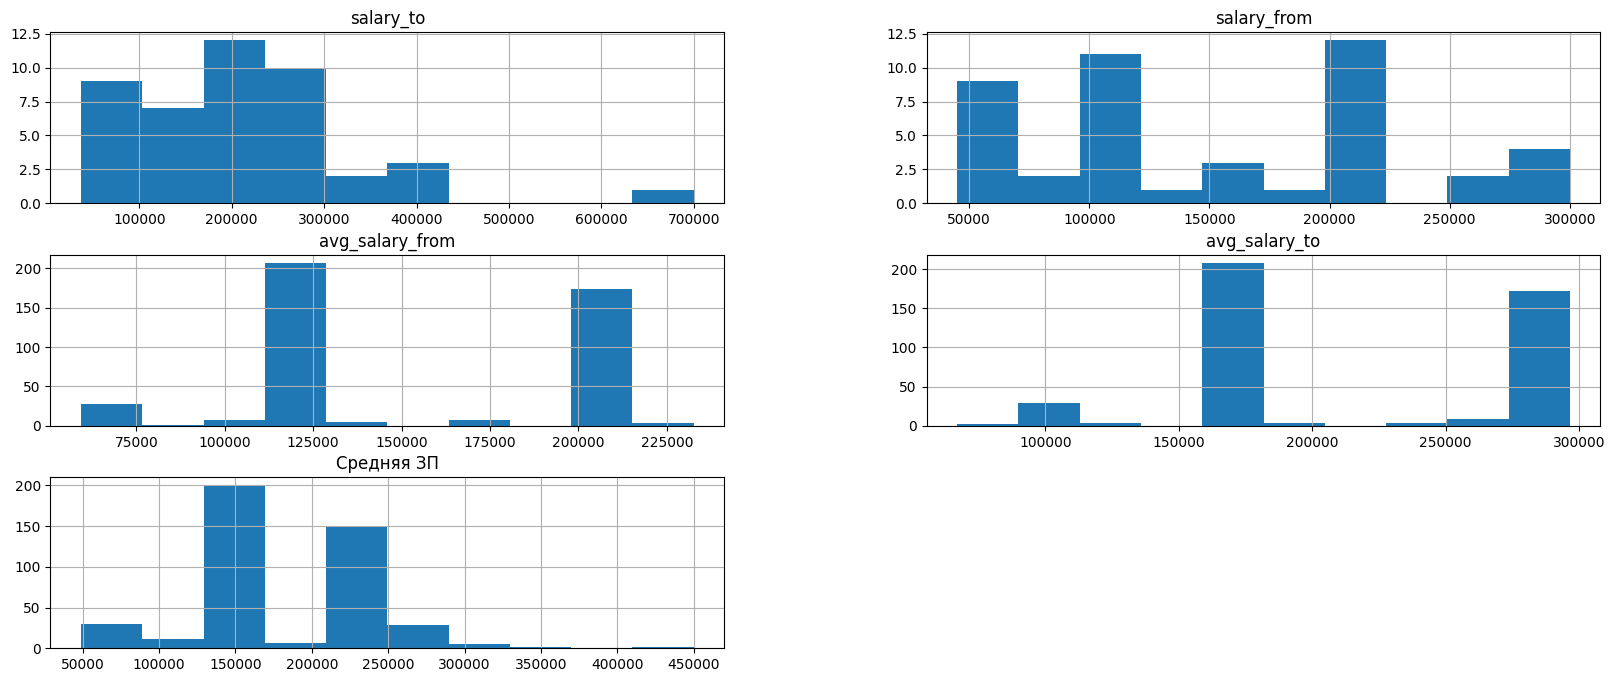

In [298]:
# Смотрим признаки с пропусками Умножаем на 100 %, находим столбцы, где доля пропусков больше 0, 
# сортируем по убыванию и выводим результат:

cols_null_percent = df_ds.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

# Посмотрим, на распределения наших признаков:
cols = cols_with_null.index
df_ds[cols].hist(figsize=(20, 8));


* В признаке 'Средняя ЗП' все же остались пропуски (432 заполнено из 466) , заменим их медианным значением по признаку
* По признаку ключевые навыки 'key_skills' также есть пропуски , заполнение пустых значений по этому признаку не будем проводить в данном исследовании ,но мы создали по нему новый признак 'Кол-во ключевых навыков' при формировании датасета


> столбцы
salary_to ,
salary_from ,
avg_salary_from ,
avg_salary_to  отображены, чтобы увидеть разницу после преобразования при формировании датасета


In [299]:
#создаем копию исходной таблицы
fill_data = df_ds.copy()

#создаем словарь имя столбца: число(признак) на который надо заменить пропуски
values = {'Средняя ЗП': fill_data['Средняя ЗП'].median()}
#заполняем пропуски в соответствии с заявленным словарем
fill_data = fill_data.fillna(values)


 #### Удаление ненужных полей , переименования признаков  , создание нового признака
* Удалим ненужные столбцы
salary_to ,
salary_from ,
avg_salary_from ,
avg_salary_to  , я их вывела чтобы увидеть разницу после преобразования , также удалим признаки area_id и employer_id , мы по ним уже создали признаки с полными наименованиями регионов и работодателей


* В признаке "Регион" присутствуют не Российские регионы , создадим новый признак 'Тип региона' , в котором будем отображать 'Россия' и 'Другие регионы'.


> Список не Российских регионов :
 Ташкент, Тбилиси, Чехия, Сербия, Армения, Кипр, Батуми, Нур-Султан, Алматы, Израиль, Абхазия, Польша, Бишкек, Литва, Баку, Турция, Минск, Черногория



In [300]:
# Удалим не нужные стобцы :  salary_to , salary_from , avg_salary_from , avg_salary_to 
fill_data.drop(['salary_to' , 'salary_from' , 'avg_salary_from' , 'avg_salary_to' ,'area_id','employer_id','id'], axis=1, inplace=True)

# переименуем признаки
fill_data = fill_data.rename(columns={'name': 'Вакансия','key_skills':'Ключевые навыки','schedule':'Тип рабочего графика'
                                      ,'experience':'Опыт работы','employment':'Тип трудоустройства'})

# Создание нового признака 'Тип региона'
lst ='Ташкент, Тбилиси, Чехия, Сербия, Армения, Кипр, Батуми, Нур-Султан, Алматы, Израиль, Абхазия, Польша, Бишкек, Литва, Баку, Турция, Минск, Черногория'
lst = lst.replace(' ','')
lst = lst.split(',') 
fill_data['Тип региона'] = fill_data['Регион'].apply(lambda x: 'Другие регионы' if x in lst else 'Россия')
display(fill_data.head())

#выводим результирующую долю пропусков
fill_data.isnull().mean()

,Вакансия,Ключевые навыки,Тип рабочего графика,Опыт работы,Тип трудоустройства,Кол-во ключевых навыков,Средняя ЗП,Регион,Работодатель,Тип региона
0,Data scientist,Python\tC++\tНаписание статей\tНаписание научн...,Полный день,От 3 до 6 лет,Полная занятость,6,249576.0,Санкт-Петербург,ЦРТ | Группа компаний,Россия
1,Data scientist по построению моделей оценки кр...,Python\tРиск-менеджмент\tМатематическая статис...,Полный день,От 1 года до 3 лет,Полная занятость,3,152709.0,Москва,Банк ВТБ (ПАО),Россия
2,Data scientist (проект Музыка),SCALA\tSpark\tHadoop\tJava\tBig Data\tPython,Полный день,От 1 года до 3 лет,Полная занятость,6,150697.0,Санкт-Петербург,VK,Россия
3,Data scientist (проект Моменты),SCALA\tSpark\tHadoop\tJava\tBig Data\tPython,Полный день,От 1 года до 3 лет,Полная занятость,6,150697.0,Санкт-Петербург,VK,Россия
4,Data scientist (Remote),Python\tC++\tНаписание статей\tНаписание научн...,Полный день,От 3 до 6 лет,Полная занятость,6,247901.0,Москва,ЦРТ | Группа компаний,Россия


Вакансия                   0.00000
Ключевые навыки            0.10515
Тип рабочего графика       0.00000
Опыт работы                0.00000
Тип трудоустройства        0.00000
Кол-во ключевых навыков    0.00000
Средняя ЗП                 0.00000
Регион                     0.00000
Работодатель               0.00000
Тип региона                0.00000
dtype: float64

#### Удаление дублей

In [301]:
fill_data.drop_duplicates(subset=['Вакансия','Ключевые навыки','Тип рабочего графика','Опыт работы'	
                                  ,'Тип трудоустройства','Кол-во ключевых навыков','Средняя ЗП'
                                  ,'Регион','Работодатель','Тип региона'])

# размеры датафрейма
print(f'размер датафрейма после очистки {fill_data.shape}')

размеры датафрейма после очистки (466, 10)


#### Поиск аномалий и зависимостей в вакансиях DS

In [302]:
# Смотрим статистику по всем числовым признакам
display(fill_data.describe())

,Кол-во ключевых навыков,Средняя ЗП
count,466.000000,466.000000
mean,5.759657,184436.403433
std,3.508846,57063.823255
min,0.000000,49000.000000
25%,4.000000,150697.000000
50%,5.000000,152709.000000
75%,7.000000,247447.750000
max,20.000000,450000.000000


> Предельные значения по признаку  'Кол-во ключевых навыков'  0 и 20
,предельные значения по признаку 'Средняя ЗП' = 49000 и 450000 .Минимальные значения вполне допустимы по признаку 'Средняя ЗП'. Необходимо детальное рассмотрение данных с максимальными значениями в этих признаках и минимальном значении по признаку 'Кол-во ключевых навыков' 

In [315]:
# Сначала выведем ко-во строк с предельными значениями
mask1 = fill_data['Кол-во ключевых навыков'] > 7
mask2 = fill_data['Кол-во ключевых навыков'] == 0
mask3 = fill_data['Средняя ЗП'] > 400
print('Данные с сортировкой по признаку "Средняя ЗП"')
display(fill_data[mask1 | mask2 | mask3].sort_values(['Средняя ЗП']))
print('Данные с сортировкой по признаку "Кол-во ключевых навыков"')
display(fill_data[mask1 | mask2 | mask3].sort_values(['Кол-во ключевых навыков']))
print('Размерность датасета',fill_data[mask1 | mask2 | mask3].shape)

Данные с сортировкой по признаку "Средняя ЗП"


,Вакансия,Ключевые навыки,Тип рабочего графика,Опыт работы,Тип трудоустройства,Кол-во ключевых навыков,Средняя ЗП,Регион,Работодатель,Тип региона
437,Junior Data Scientist (Стажер),Python\tSQL\tData Mining\tC++\tМатематический ...,Гибкий график,Нет опыта,Стажировка,11,49000.0,Екатеринбург,КБ Уральский банк реконструкции и развития (УБ...,Россия
187,Data Scientist (Junior+),Python\tOpenCV\tTensorflow\tComputer Vision\tН...,Полный день,От 1 года до 3 лет,Полная занятость,8,60000.0,Пермь,Випакс+,Россия
56,Ведущий AI/ML инженер,Python\tUnix\tАналитическое мышление\tНейронны...,Удаленная работа,Нет опыта,Полная занятость,7,64000.0,Екатеринбург,SteadyControl,Россия
232,Специалист ML/DS,Python\tNumpy\tPyTorch\tPandas\tМатематический...,Полный день,От 3 до 6 лет,Полная занятость,9,67126.0,Алматы,Cybernet (Кибернет),Другие регионы
44,Data Scientist (Junior),Python\tMachine Learning\tPandas\tSQL\tNumpy\t...,Полный день,Нет опыта,Частичная занятость,8,72500.0,Москва,Строительный Двор,Россия
...,...,...,...,...,...,...,...,...,...,...
169,Data Scientist,PyTorch\tPython\tTensorflow\tComputer Vision\t...,Полный день,От 3 до 6 лет,Полная занятость,5,297781.0,Санкт-Петербург,OVISION,Россия
243,Senior Data Scientist,Знание стека DS\tЗнание теории машинного обуче...,Полный день,От 3 до 6 лет,Полная занятость,3,300000.0,Санкт-Петербург,JSA Group,Россия
242,Senior Data Scientist,Знание стека DS\tЗнание теории машинного обуче...,Полный день,От 3 до 6 лет,Полная занятость,3,300000.0,Москва,JSA Group,Россия
100,ML & Advanced analytics Lead / Lead Data Scien...,Tableau\tАнглийский язык\tPython\tАнализ данны...,Полный день,От 3 до 6 лет,Полная занятость,5,350000.0,Москва,AppQuantum,Россия


Данные с сортировкой по признаку "Кол-во ключевых навыков"


,Вакансия,Ключевые навыки,Тип рабочего графика,Опыт работы,Тип трудоустройства,Кол-во ключевых навыков,Средняя ЗП,Регион,Работодатель,Тип региона
233,Data Scientist,None,Полный день,От 3 до 6 лет,Полная занятость,0,247901.0,Москва,МСП Банк,Россия
33,Data scientist (розничные риски),None,Удаленная работа,От 1 года до 3 лет,Полная занятость,0,145810.0,Казань,Ак Барс Банк,Россия
418,Data Scientist,None,Полный день,От 3 до 6 лет,Полная занятость,0,249576.0,Санкт-Петербург,"БИОКАД, биотехнологическая компания",Россия
226,Senior/Team Lead Data Scientist,None,Полный день,От 3 до 6 лет,Полная занятость,0,247901.0,Москва,СБЕР,Россия
421,ML-инженер/разработчик NLP,None,Полный день,От 3 до 6 лет,Полная занятость,0,219391.0,Алматы,"ALSECO, АО",Другие регионы
...,...,...,...,...,...,...,...,...,...,...
234,Data Scientist,Python\tSQL\tLinux\tHadoop\tАнализ данных\tCat...,Полный день,От 3 до 6 лет,Полная занятость,17,247901.0,Москва,Яндекс,Россия
182,ML/DS Team Lead,PyTorch\tPython\tSQL\tУправление проектами\tNL...,Полный день,От 1 года до 3 лет,Полная занятость,19,152709.0,Москва,АНО ЦИСМ,Россия
223,Аналитик данных\Data Scientist,Python\tSQL\tАнализ данных\tСтатистический ана...,Полный день,От 1 года до 3 лет,Полная занятость,19,145810.0,Казань,Эттон,Россия
224,Аналитик данных\Data Scientist,Python\tSQL\tАнализ данных\tСтатистический ана...,Полный день,От 1 года до 3 лет,Полная занятость,19,149932.0,Иннополис,Эттон,Россия


Размерность датасата (466, 10)


> Кол-во строк по предельным значениям по двум признакам совпало с кол-вом строк в очищенном датасете, поэтому исследуем все данные 

##### Построим коробчатые диаграммы по этим признакам

In [319]:
# Коробчатая диаграмма 
fig = px.box(
    data_frame=fill_data,
    x='Опыт работы',
    y='Средняя ЗП',
    color='Тип региона',
    title='Распределение "Средней ЗП" по типу региона и опыта работы',
    height=700,
    width=1000,
)
fig.show() 

# Коробчатая диаграмма 
fig = px.box(
    data_frame=fill_data,
    x='Опыт работы',
    y='Кол-во ключевых навыков',
    color='Тип региона',
    title='Распределение признака "Кол-во ключевых навыков" по типу региона и опыта работы',
    height=700,
    width=1000,
)
fig.show() 


### Выводы по дополнительному исследованию

>  В нашем наборе данных не так много данных, например, коробки не во всех категориях четко отслеживаются , но зависимость среднего уровня заработной платы от опыта работы хорошо прослеживается , если смотреть на первую коробчатую диаграмму.


По ней также можно увидеть одну аномалию , это вакансия в иностранной компании с требуемым опытом работы от 3 до 6 лет с предлагаемой заработной платой в 67 тыс.руб. , что не соответствует уровню заработной платы в категории опыта работы от 3 до 6 лет даже в Российской компании и возможно повлияла на подсчет среднего значения Средней ЗП при формировании датасета, а это критично для всего признака.


В категории опыта работы от 6 лет коробка совсем не сформировалась , думаю так могло случится по двум или одной из двух причин , это не достаточность данных и формирование среднего значения по признакам с заработной платой, мне пришлось заполнить им 90% недостающих данных, что конечно не совсем правильно, но это учебный проект . В реальных проектах , этого стоит избегать , но все таки получилось найти одну аномалию по этому признаку.


> По второй диаграмме обнаружены 4 аномалии это :
* две вакансии с опытом работы от 3 до 6 лет без ключевых навыков
* одна вакансия с опытом работы от 6 лет без ключевых навыков  
* одна вакансия в категории с опытом работы от 1 года до 3 лет с 20ю ключевыми навыками


По второй диаграмме также прослеживаются выбросы в сторону увеличения в категориях с опытом работы от 1 года до 3 лет и от 3 до 6 лет , что говорит о наличии в этих вакансиях специфичных навыков у более опытных специалистов.


***

### Общий вывод по проекту

#### Подведем итог исследования
Данные, представленные в проекте, показывают вакансии работодателей для соискателей из разных регионов и с разными сферами деятельности . Кол-во данных достаточно обширны для выявления зависимостей и отображения статистики. Основная масса вакансий с типом трудоустройства на полный рабочий день , с типом рабочего графика полная занятость. Процентное соотношение по опыту работы : 53% - От 1 года до 3 лет , 29.5% - От 3 до 6 лет , 14.6 - Нет опыта , 2.7% - Более 6 лет


> Основная масса работодателей хотят видеть в своей компании молодых специалистов готовых на полный рабочий день с полной занятостью , молодых , потому что их уровень заработной платы самый низкий. Так же работодатель готов предоставить соискателю удаленный формат работы , но таких вакансий примерно в три раза меньше , предполагаю , что это связано с тем  что в нашей базе представлены вакансии не только из IT сферы .


Не у всех работодателей указана сфера деятельности , но у тех что она указана 3553 работодателя в качестве сферы деятельности указывают "Разработка программного обеспечения" , что говорит о высоком спросе на разработчиков ПО.
По количеству вакансий лидирует компания "Яндекс", думаю это связано с вакансиями для любого региона , с удаленным форматом работы.
1771  вакансий имеет отношение к данным ,  51 вакансий имеет отношение к данным для соискателя без опыта работы , что дает возможность найти работу даже не опытным специалистам . Основные навыки к специалистам данного направления это знание предметной области , Python и Базы данных.


#### Выводы по дополнительному исследованию
Дополнительное исследование показало наличие в представленных данных 466 вакансий Data Scientist . Исследование этого набора данных выявило 5 аномалий и зависимости признака "Средней ЗП" по типу региона и опыта работы и признака "Кол-во ключевых навыков" по типу региона и опыта работы.
Четко прослеживается Уровень заработной платы от опыта работы и увеличение специфических ключевых навыков с увеличением опыта работы.


#### Варианты продолжения исследования


В качестве еще одного варианта исследования может выступать детальное исследование признака по ключевым навыкам ,можно привести данные по нему к общему виду, создать под каждый навык отдельный признак, проставив в них значения 0 и 1 и построить по ним тепловую карту.
